# Logistic Regression

Clone the git repository on your laptop using the command below:

git clone https://github.com/fbarez/MLWorkshopSeries


## Motivation

For the full mathematical theory of logistic regression, please refer to *Introduction to Statistical Learning* (https://www-bcf.usc.edu/~gareth/ISL/ISLR%20First%20Printing.pdf) section 4-4.3.

In this workshop, we shall dicuss logistic regression as method for classification: specifically Binary classification. 

In the classic linear regression workshop (house prices) we solved for continous values - while in Logistic Regression (hereafter LR) we are interested in **discrete** categories, such as pass, fail, win, lose and etc...

## Background 

Using a normal linear model for a binary classification will result in a poor fit. Therefore we use logistic regression. 




![title](imagen.png)

The $y$ axis represents the probability of belonging to a particular group (1 = repaying the loan, 0 = defaulting on the loan) while the $x$ axis represent the amount of money in a bank account. 

The golden blue line shows a linear regression fit, which does not represent the data. As can be seen probabilities of below 0 are being predicted, which does not make sense.  

Instead, we can transform this into a logistic regression curve; we can see that the logistic regression curve can only go between 0 and 1, and that is very important in understanding binary classification. 

![title](log1.png)

### Sigmoid Function

The sigmoid function (also known as the logistic function) takes any value $z$ and returns a value between 0 and 1.
Irrespective of the value that $z$ can take the resilting value will always be between 0 and 1 and this is indeed the key to understanding the sigmoid function.
![title](sigmiod.png)
This lays out the path nicely to include our linear regression solution and incorporate it into the sigmoid function. This will graphically look like this: A simple linear model follows $y = mx+c$ and we can see the linear model in the graph below follows a $y$ = $\beta_{0} +\beta_{1}x$ and we can take this and put inside the sigmoid function we will be able to tranform our linear model into a logistic model. Irrespective of the value of the linear model the output will be between 0 and 1. Nnd this is done by the following formula:
$$p =  \frac{1}{1+e^{-(\beta_{0} +\beta_{1}x)}}$$ Note: $x$ can be multidimentional. 


![title](loglin.png)



## Model Evaluation 

once we have trained a logistic model on a training set we would need to evaluate the model using some matrix on the test set. The confusion matrix is a common evalution technique that is used to evaluate the performance of the training set on the test set. 

### Confusion Matrix 

a confusion matrix is a table that describes the performance of the model for the training data when the true values are known. 
![title](conf.jpg)

Example: 
Imagine we are testing for a particular disease, with No = negative test = False = 0 and Yes = positive test = True = 1

The terminology in the graph comes from the field of medicine: a TP (true positive) is the case where the predicted values is a yes and the actual value is also a yes; a TN (true negative) is the case where the precided value is a no and the actual value is also a no. 

FP (false positives) are wehere we have predicted a yes where in reality they do not have the disease (also known as type I error). A FN (false negative) refers to the case where we have predicted a No but in reality they do have the disease (also known as type II error).

This terms allow us to calculate the over all performance of the model: 

Accuracy: how often are the model's predictions correct? 

Missclassification rate: over all how often is the model wrong? 

The terminology, type I and type II error is broken down by the image below:

![title](t1t2.png)

Precision: Percision shows how often something is correct.

Recall: Show how often something is correct as a fraction of the total number of correct option


## Practice 

In this practical we will use the famous Titanic Dataset. 
The aim of this practical is to predict a classification between *survived* or *deceased*.

## Import Libraries

In [3]:
#Import pandas, numpy, matplotlib and seaborn 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

In [4]:
# read the data frame - titanic
tdf = pd.read_csv('titanic_train.csv')

In [5]:
# look up the first few values of the data frame
tdf.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


`SibSp` indicates the number of siblings or spouses on board

`Parch` indicates the number of parents or children on board 

### Exploring the data

First, let's check for missing values

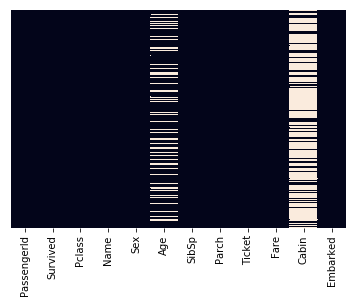

In [6]:
# check for missing values - you may use seaborn to visualise this 

missing_values = tdf.isnull()

sns.heatmap(missing_values,
            yticklabels=False, cbar=False)

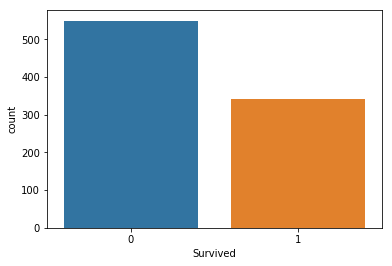

In [7]:
#visulise the survivals vs non survivals 

sns.countplot(x='Survived', data=tdf)

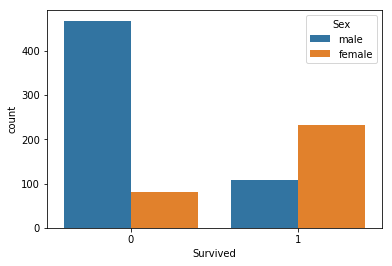

In [8]:
# split the servivals and non servivasl by gender 

sns.countplot(x='Survived', hue='Sex', data=tdf)

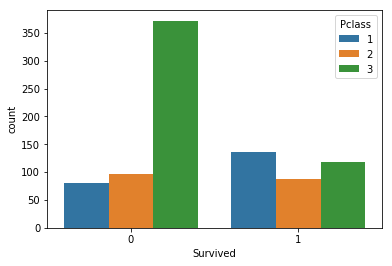

In [9]:
# split the survivals by ticket class 
sns.countplot(x='Survived', hue='Pclass', data=tdf)

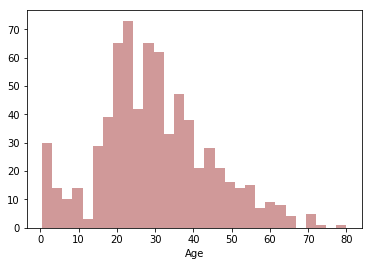

In [10]:
# plot the age distribution of passengers using seaborn 
# "dropna" removes entries that have a N/A value

sns.distplot(tdf['Age'].dropna(), kde=False, color='darkred', bins=30)

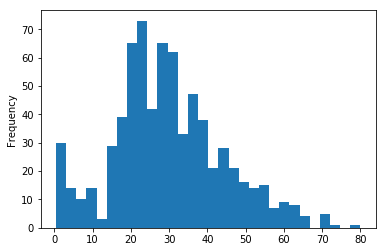

In [11]:
# plot the age distribution of passangers using pandas

tdf['Age'].plot.hist(bins=30)

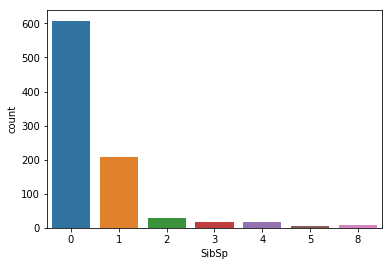

In [12]:
#visulise the number os siblings/ spouses of the passangers
sns.countplot(x='SibSp', data=tdf)

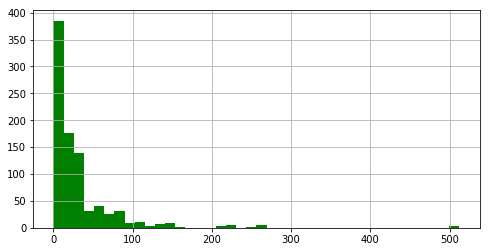

In [13]:
# check the distribution of the fare colum - ticket prices
tdf['Fare'].hist(color='green', bins=40, figsize=(8,4))

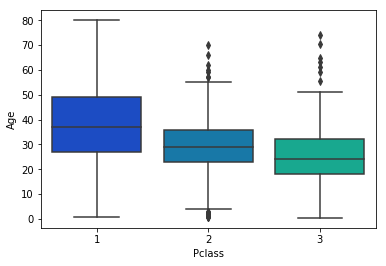

In [14]:
# show age distributions by class
sns.boxplot(x='Pclass', y='Age', data=tdf, palette='winter')

### Data Cleaning 

In [15]:
# define a function that changes missing Age to the average for that class

def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age

In [16]:
# apply that function and overwrite the Age column
tdf['Age'] = tdf[['Age','Pclass']].apply(impute_age,axis=1)

In [17]:
# Drop the "Cabin" column, which has too many empty values
tdf.drop('Cabin', axis=1, inplace=True)

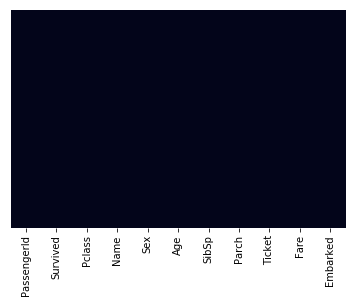

In [18]:
sns.heatmap(tdf.isnull(), yticklabels=False, cbar=False, color='red')

In [19]:
# show what we have now
tdf.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


### convert categorical features

In [20]:
tdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(4)
memory usage: 76.6+ KB


In [21]:
sex = pd.get_dummies(tdf['Sex'], drop_first=True)
embark = pd.get_dummies(tdf['Embarked'], drop_first=True)

In [22]:
tdf.drop(['Sex','Embarked','Name','Ticket'], axis=1,inplace=True)

In [23]:
tdf = pd.concat([tdf,sex,embark],axis=1)

In [24]:
tdf.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


### Training a logistic model

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
X_train, X_test, y_train, y_test = train_test_split(tdf.drop('Survived',axis=1), 
                                                    tdf['Survived'], test_size=0.30, 
                                                    random_state=101)

In [27]:
from sklearn.linear_model import LogisticRegression

In [28]:
logmodel = LogisticRegression()

logmodel.fit(X_train,y_train)

/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [29]:
pred = logmodel.predict(X_test)

In [30]:
### EVALUATION

from sklearn.metrics import classification_report
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.77      0.88      0.82       154
           1       0.79      0.64      0.71       114

   micro avg       0.78      0.78      0.78       268
   macro avg       0.78      0.76      0.76       268
weighted avg       0.78      0.78      0.77       268



In [31]:
from sklearn.metrics import confusion_matrix

In [32]:
confusion_matrix(y_test, pred)

array([[135,  19],
       [ 41,  73]])

In [33]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
print('The models Accuracy is:', accuracy_score(y_test, pred))
print('The models Precision is:', precision_score(y_test, pred))
print('The models Recall is:', recall_score(y_test, pred))   


The models Accuracy is: 0.7761194029850746
The models Precision is: 0.7934782608695652
The models Recall is: 0.6403508771929824
